##### 소수 (Prime Number)
- 소수란 1보다 큰 자연수 중에서 1과 자기 자신을 제외한 자연수로는 나누어 떨어지지 않는 자연수이다.
    - 6은 1, 2, 3, 6으로 나누어떨어지므로 소수가 아니다
    - 7은 1과 7을 제외하고는 나누어떨어지지 않으므로 소수이다
- 코딩 테스트에서는 어떠한 자연수가 소수인지 아닌지 판별해야 하는 문제가 자주 출제된다

- 소수의 판별: 기본적인 알고리즘

In [3]:
# 소수의 판별: 기본적인 알고리즘 코드

# 소수 판별 함수(2이상의 자연수에 대하여)
def is_prime_number(n):
    for i in range(2, xn): # 2부터 (n - 1)까지의 모든 수를 확인
        if n % i == 0:  # n가 해당 수로 나누어 떨어진다면
            return False # 소수가 아님
    return True # 소수임

print(is_prime_number(7))

True


- 소수의 판별: 기본적인 알고리즘 성능 분석
    - 2부터 𝑋-1까지의 모든 자연수에 대하여 연산을 수행해야 한다
    - 모든 수를 하나씩 확인한다는 점에서 시간 복잡도는 O(N) 이다

- 약수의 성질
    - 모든 약수가 가운데 약수를 기준으로 곱셈 연산에 대해 대칭을 이루는 것을 알 수 있다
        - 예를 들어 16의 약수는 1, 2, 4, 8, 16이다
        - 이때 2 X 8 = 16은 8 X 2 = 16과 대칭이다
    - 따라서 우리는 특정한 자연수의 모든 약수를 찾을 때 가운데 약수(제곱근)까지만 확인하면 된다
        - 예를 들어 16이 2로 나누어떨어진다는 것은 8로도 나누어떨어진다는 것을 의미한다

    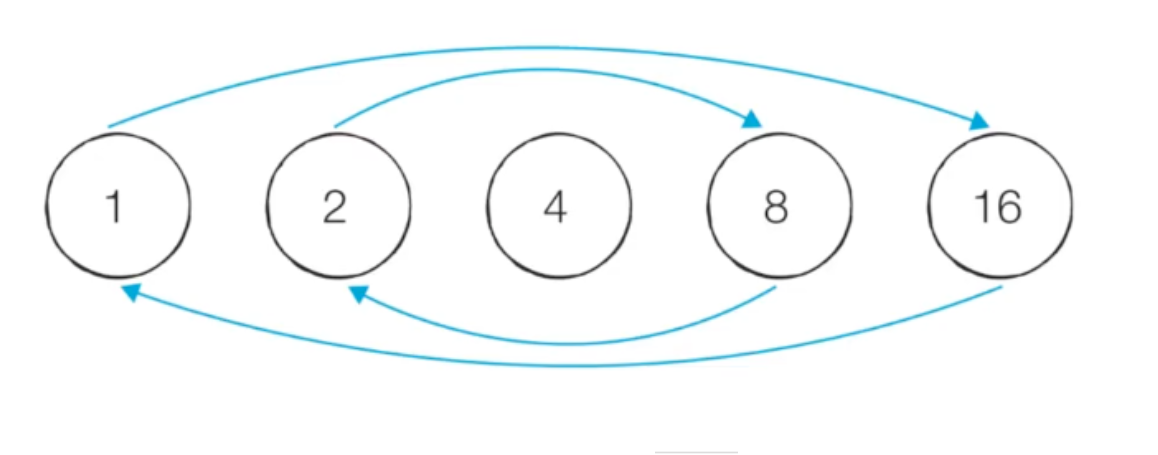

In [5]:
# 개선된 소수 판별 알고리즘

import math

# 소수 판별 함수
def is_prime_number(n):
    # 2부터 n의 제곱근까지의 모든 수를 확인하며        
    for i in range(2, int(math.sqrt(n))+1):
        # n이 해당 수로 나누어 떨어진다면
        if n % i == 0:
            return False # 소수가 아님
    return True # 소수임

print(is_prime_number(4)) # 4는 소수가 아님
print(is_prime_number(7)) # 7은 소수임

False
True


- 소수의 판별: 개선된 알고리즘 성능 분석
    - 2부터 𝑋의 제곱근(소수점 이하 무시)까지의 모든 자연수에 대하여 연산을 수행해야 한다
    
    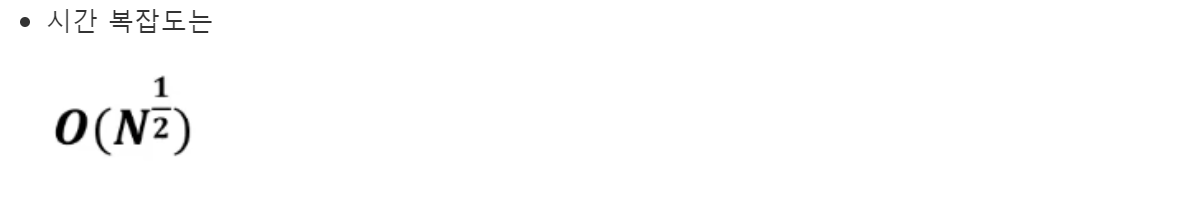

#### 에라토스테네스의 체 알고리즘
- 다수의 자연수에 대하여 소수 여부를 판별할 때 사용하는 대표적인 알고리즘이다
- 에라토스테네스의 체는 N보다 작거나 같은 모든 소수를 찾을 때 사용할 수 있다
<br><br>
- 에라토스테네스의 체 알고리즘의 구체적인 동작 과정은 다음과 같다
    1. 2부터 𝑁까지의 모든 자연수를 나열한다
    2. 남은 수 중에서 아직 처리하지 않은 가장 작은 수 𝑖를 찾는다
    3. 남은 수 중에서 i의 배수를 모두 제거한다(𝑖는 제거하지 않는다)
    4. 더 이상 반복할 수 없을 때까지 2번과 3번의 과정을 반복한다

##### 에라토스테네스의 체의 원리 이해하기
- 에라토스테네스의 체의 원리 이해하기
1. 주어진 범위까지 리스트를 생성한다. 
    - 1은 소수가 아니므로 삭제하고, 리스트는 2부터 시작한다.

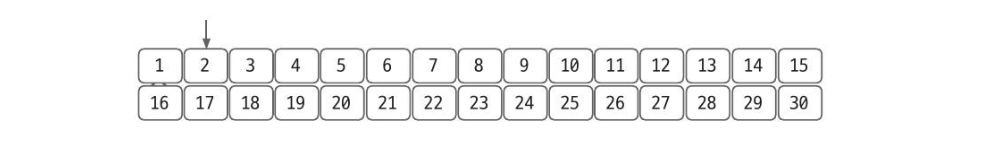

2. 선택한 수의 배수를 모두 삭제한다. 
    - 현재의 경우 2의 배수를 모두 삭제

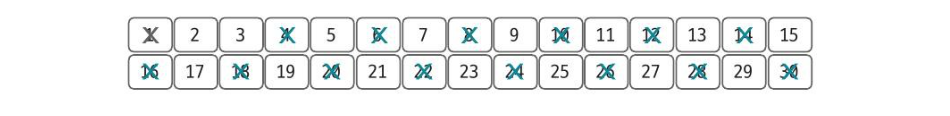

3. 다음 지워지지 않은 수를 선택한다. <br>
즉, 3을 선택하고 선택한 수의 모든 배수를 삭제한다. 
    - 이미 지운 수는 다시 지우지 않는다.

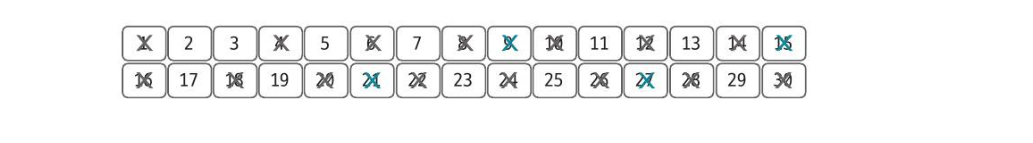

4. 앞의 과정을 리스트의 끝까지 반복한다.

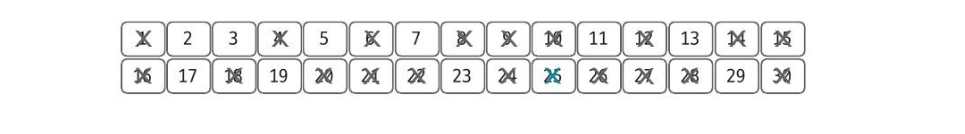

5. 삭제되지 않은 수를 모두 출력한다.

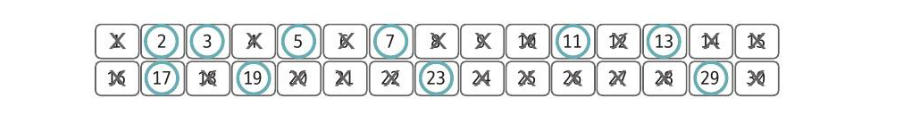

- 즉, 1부터 30까지의 수 중 소수는 2, 3, 5, 7, 11, 13, 17, 19, 23, 29 이다.

- 일반적으로 에라토스테네스의 체를 구현하려면 이중 for문을 이용하므로 시간 복잡도가 O(N2) 정도라고 판단할 수 있다. 
- 하지만 실제 시간 복잡도는 최적화의 정도에 따라 다르겠지만, 일반적으로 O(Nlog(logN))이다. 
- 그 이유는 배수를 삭제하는 연산으로 실제 구현에서 바깥쪽 for문을 생략하는 경우가 빈번하게 발생하기 때문. 
- 이러한 이유 때문에 에라토스테네스의 체 기법은 현재에도 코딩 테스트에서 소수를 구하는 일반적인 방법으로 통용되고 있다.

In [6]:
# 코드 입력

import math

n = int(input()) # 마지막 수
data = [True] * (n+1) # 처음엔 모든 수가 소수(True)인 것으로 초기화
data[0] = False # 0에 위치한 값은 소수가 아님(1)

# 에라토스테네스의 체 알고리즘
for i in range(2, int(math.sqrt(n))+1): # 2부터 n의 제곱근까지의 모든 수를 확인하며
    if data[i] == True: # i가 소수인 경우 (남은 수인 경우)
        for j in range(i+i, n+1, i): # i를 제외한 i의 모든 배수를 지우기
            data[j] = False
            
# 모든 소수 출력
for i in range(2, n+1):
    if data[i]:
        print(i, end=' ')

2 3 5 7 11 13 17 19 23 29 

In [17]:
# 시작값 / 종료값 => 소수인지 아닌지 판별

import math

m, n = map(int,input().split()) # 시작값, 종료값 입력
data = [True] * (n+1) # 처음엔 모든 수가 소수(True)인 것으로 초기화
data[0] = False # 0에 위치한 값은 소수가 아님(1)

# 에라토스테네스의 체 알고리즘
for i in range(2, int(math.sqrt(n))+1): # 2부터 n의 제곱근까지의 모든 수를 확인하며
    if data[i] == True: # i가 소수인 경우 (남은 수인 경우)
        for j in range(i+i, n+1, i): # i를 제외한 i의 모든 배수를 지우기
            data[j] = False
            
# 모든 소수 출력
for i in range(m, n+1):
    if data[i]:
        print(i)

3
5
7
11
13


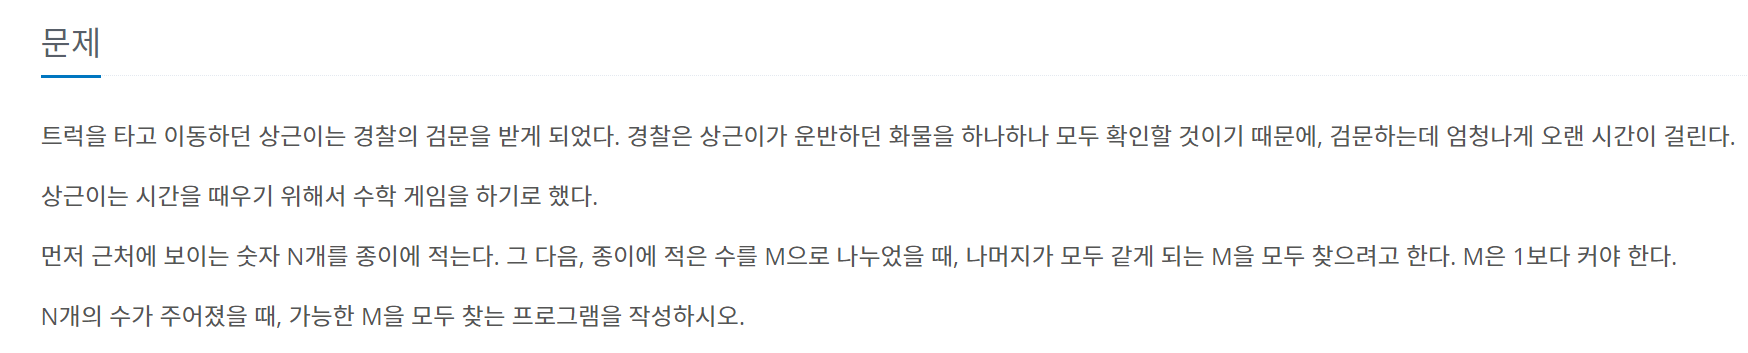

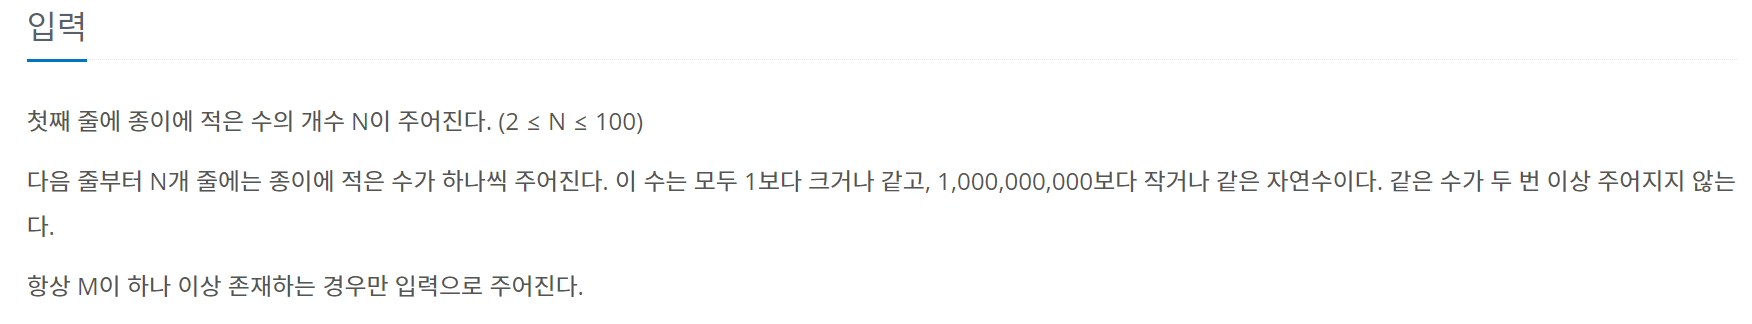

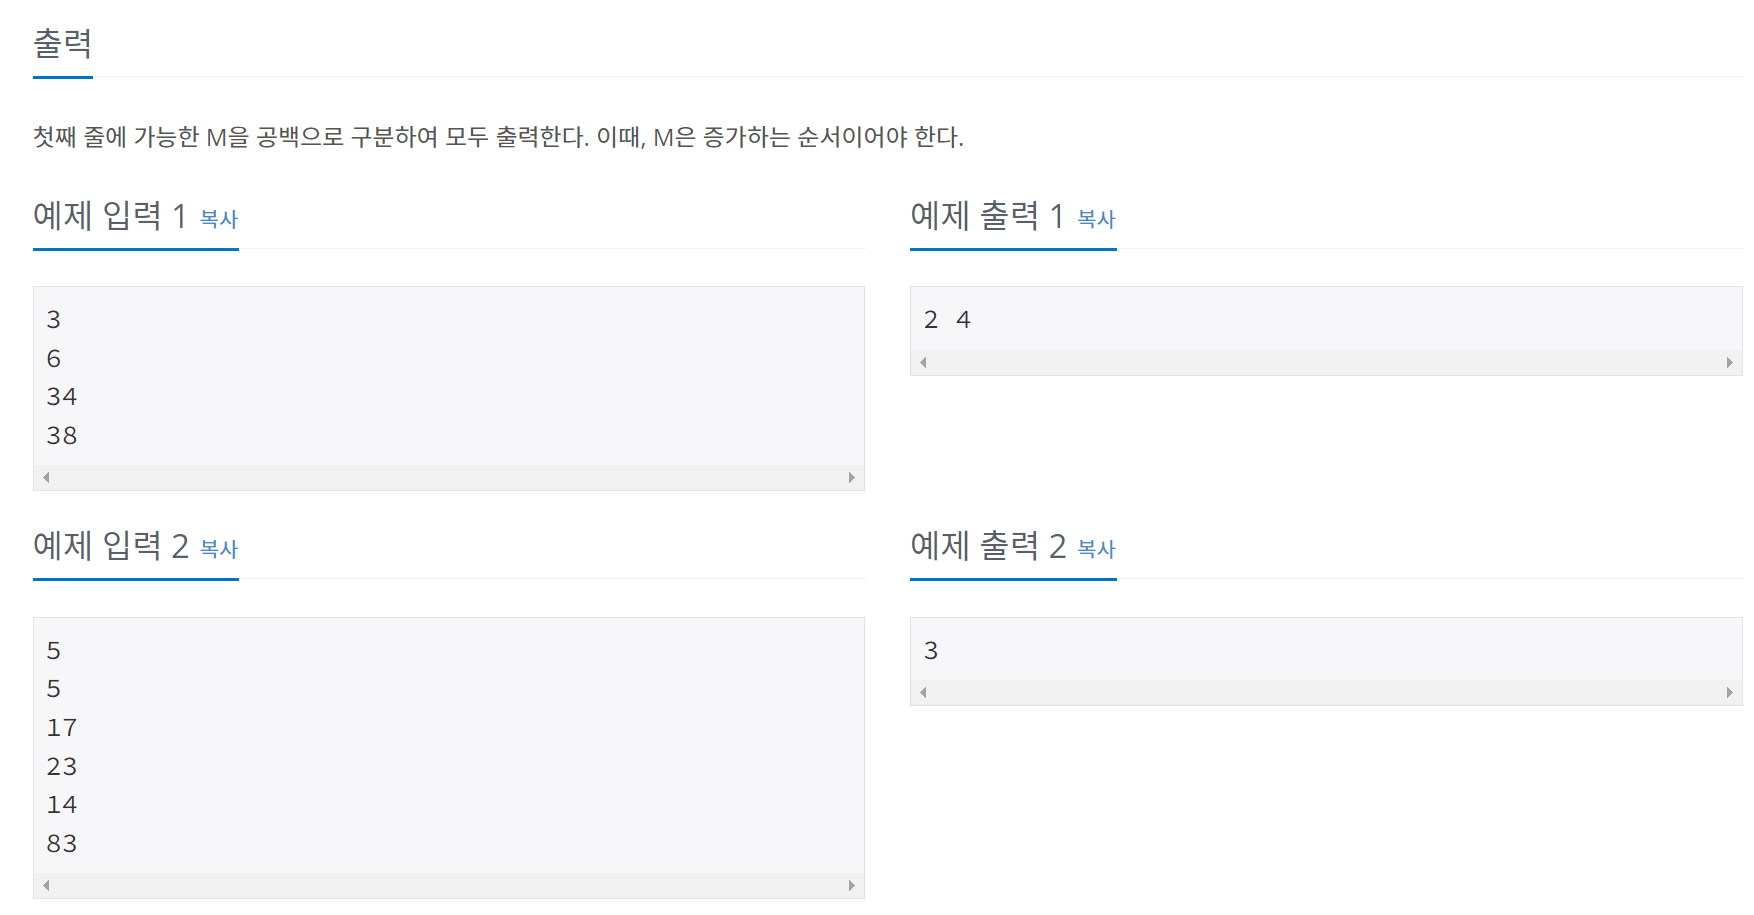

In [13]:
# 코드 입력

N = int(input()) # N을 입력받는다.(수의 개수)
num = sorted( [int(input()) for _ in range(N)] ) # N개의 수를 입력받아 정렬한다.
reName= [] # 새로운 리스트 생성

# B-A, C-B, D-C ... N-(N-1)까지의 차이를 구한다. = 새 리스트 생성
for i in range(1, N):
    reName.append(num[i] - num[i-1])
# print(reName)
    
# 새 리스트의 최대공약수를 구한다.(유클리드 호제법)
def find_gcd(a, b):
    num = b
    div = a
    result = num % div
    while result != 0:
        num = div
        div = result
        result = num % div
    return div    
        
# 최대 공약수 계산후 해당 값의에 대한 1을 제외한 약수를 구한다.
GCD = reName[0]
for idx in range(1, len(reName)):
    GCD = find_gcd(GCD, reName[idx])

# 1제외한 2부터 제곱근까지 For 문을 돌려 약수를 구한다.     
res=set()   # 중복값 제거를 위해 set() 사용
for i in range(2, int(GCD**0.5)+1):
    if GCD % i == 0:
        res.add(i)
        res.add(GCD//i)
        
res.add(GCD)  # 1일때는 제외하므로 GCD를 추가한다.(자기 자신)
print(*sorted(list(res)))
        

2 4
